In [1]:
!pip install qiskit
!pip install qiskit_aer
!pip install pylatexenc

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 40.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 49.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 71.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 4.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136817 sha256=506365cbf26a9e0cb8ed7939f0ae9eb6312239668ce2da4ab24a38df4bfb34bb
  Stored in directory: /root/.cache/pip/wheels/06/3e/78/fa1588c1ae991bbfd814af2bcac6cef7a178beee1939180d46
Successfully built pylatexenc


Initial state of qubit 0:


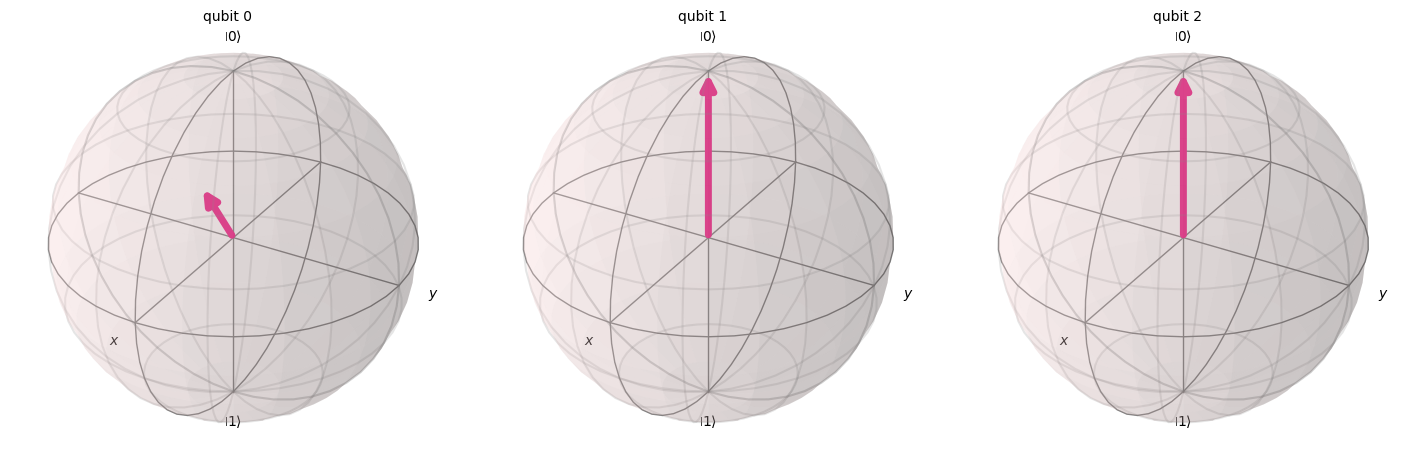

Fidelity between initial and teleported states: 1.000000

Bob’s final qubit (qubit 2) Bloch vector:


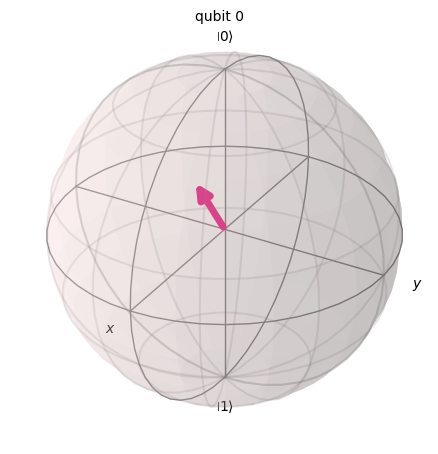

In [2]:
# Quantum Teleportation (Coherent version) – Qiskit 2.x compatible
# Works on modern qiskit-aer simulators

from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.quantum_info import Statevector, partial_trace
from qiskit.visualization import plot_bloch_multivector
import numpy as np
import matplotlib.pyplot as plt

# 1️⃣ Build the teleportation circuit
qc = QuantumCircuit(3)

# Prepare arbitrary state |ψ⟩ on qubit 0
theta, phi = 0.8, 0.3
qc.ry(theta, 0)
qc.rz(phi, 0)

# Save initial state for comparison
sv_initial = Statevector.from_instruction(qc)
print("Initial state of qubit 0:")
display(plot_bloch_multivector(sv_initial))

# Create Bell pair between qubits 1 and 2
qc.h(1)
qc.cx(1, 2)

# Bell measurement part (but coherent)
qc.cx(0, 1)
qc.h(0)

# Coherent corrections
qc.cx(1, 2)
qc.cz(0, 2)

# Save final statevector explicitly (Qiskit 2.x requires this)
qc.save_statevector()

# 2️⃣ Simulate
sim = AerSimulator()
compiled = transpile(qc, sim)
result = sim.run(compiled).result()

# Retrieve the saved statevector
sv_final = result.data(0)["statevector"]
sv_final = Statevector(sv_final)

# 3️⃣ Compare: initial vs Bob’s (qubit 2) final state
rho_bob = partial_trace(sv_final, [0, 1])
rho_init = partial_trace(sv_initial, [1, 2])

# Extract the dominant pure states (since both should be pure)
eigvals_b, eigvecs_b = np.linalg.eigh(rho_bob.data)
eigvals_i, eigvecs_i = np.linalg.eigh(rho_init.data)
bob_state = eigvecs_b[:, np.argmax(eigvals_b)]
init_state = eigvecs_i[:, np.argmax(eigvals_i)]

# Compute fidelity
fidelity = np.abs(np.vdot(init_state, bob_state)) ** 2
print(f"Fidelity between initial and teleported states: {fidelity:.6f}")

# 4️⃣ Visualize Bloch spheres (fixed)
print("\nBob’s final qubit (qubit 2) Bloch vector:")

# Convert rho_bob (DensityMatrix) → pure statevector (dominant eigenvector)
eigvals_b, eigvecs_b = np.linalg.eigh(rho_bob.data)
bob_state = eigvecs_b[:, np.argmax(eigvals_b)]  # dominant eigenvector
bob_sv = Statevector(bob_state)

display(plot_bloch_multivector(bob_sv))

##Task 1: Custom State Teleportation

Initial state of qubit 0 (theta=1.57, phi=0.00):


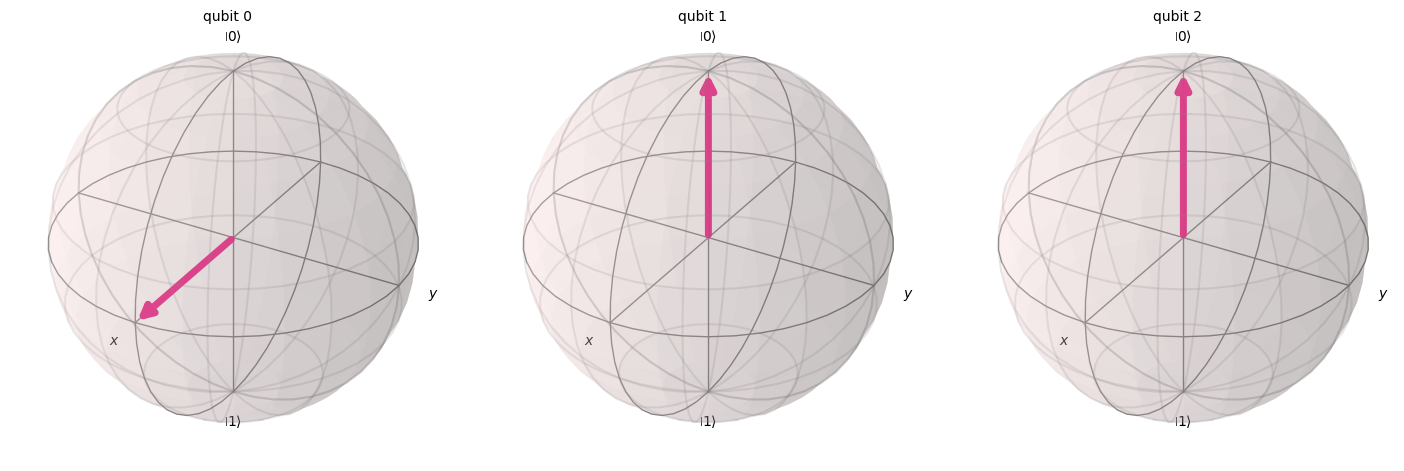

Fidelity between initial and teleported states: 1.000000

Bob’s final qubit (qubit 2) Bloch vector:


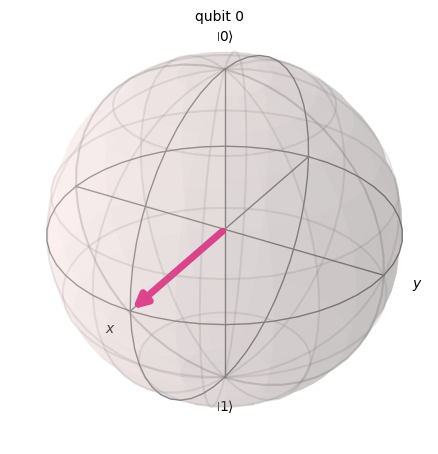

In [6]:
!pip install qiskit qiskit_aer pylatexenc matplotlib numpy

import numpy as np
import matplotlib.pyplot as plt
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, transpile
from qiskit_aer import AerSimulator
from qiskit.quantum_info import Statevector, partial_trace, DensityMatrix
from qiskit.visualization import plot_bloch_multivector, plot_histogram
from qiskit_aer.noise import NoiseModel, depolarizing_error

pi = np.pi
qc = QuantumCircuit(3)

theta, phi = pi/2, 0.0

qc.ry(theta, 0)
qc.rz(phi, 0)

sv_initial = Statevector.from_instruction(qc)
print(f"Initial state of qubit 0 (theta={theta:.2f}, phi={phi:.2f}):")
display(plot_bloch_multivector(sv_initial))

qc.h(1)
qc.cx(1, 2)

qc.cx(0, 1)
qc.h(0)

qc.cx(1, 2)
qc.cz(0, 2)
qc.save_statevector()

sim = AerSimulator()
compiled = transpile(qc, sim)
result = sim.run(compiled).result()
sv_final = Statevector(result.data(0)["statevector"])

rho_bob = partial_trace(sv_final, [0, 1])
rho_init = partial_trace(sv_initial, [1, 2])

eigvals_b, eigvecs_b = np.linalg.eigh(rho_bob.data)
eigvals_i, eigvecs_i = np.linalg.eigh(rho_init.data)
bob_state = eigvecs_b[:, np.argmax(eigvals_b)]
init_state = eigvecs_i[:, np.argmax(eigvals_i)]

fidelity = np.abs(np.vdot(init_state, bob_state)) ** 2
print(f"Fidelity between initial and teleported states: {fidelity:.6f}")

print("\nBob’s final qubit (qubit 2) Bloch vector:")
bob_sv = Statevector(bob_state)
display(plot_bloch_multivector(bob_sv))

##Task 2: Add Classical Measurement

Initial state of qubit 0:


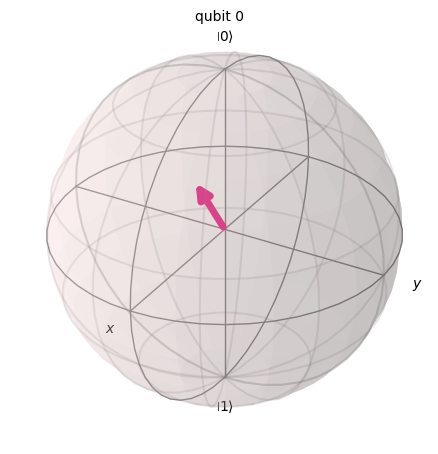

Fidelity between initial and teleported states: 1.000000

Bob’s final qubit (qubit 2) state:


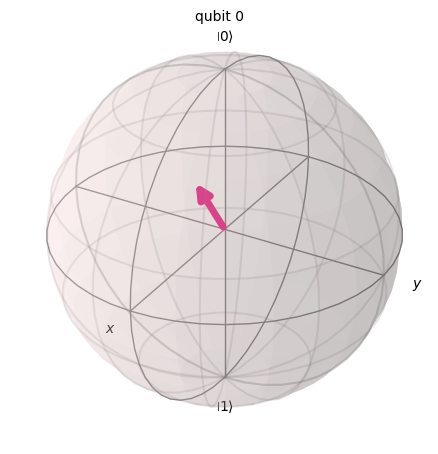

In [8]:
theta, phi = 0.8, 0.3
initial_state_qc = QuantumCircuit(1)
initial_state_qc.ry(theta, 0)
initial_state_qc.rz(phi, 0)
sv_initial = Statevector.from_instruction(initial_state_qc)
rho_init = DensityMatrix(sv_initial)

print("Initial state of qubit 0:")
display(plot_bloch_multivector(sv_initial))

qr = QuantumRegister(3, name="q")
crz = ClassicalRegister(1, name="crz")
crx = ClassicalRegister(1, name="crx")
qc = QuantumCircuit(qr, crz, crx)

qc.ry(theta, 0)
qc.rz(phi, 0)
qc.barrier()

qc.h(1)
qc.cx(1, 2)
qc.barrier()

qc.cx(0, 1)
qc.h(0)
qc.barrier()
qc.measure(0, crz)
qc.measure(1, crx)
qc.barrier()

with qc.if_test((crx, 1)):
    qc.x(2)
with qc.if_test((crz, 1)):
    qc.z(2)

qc.save_statevector()

sim = AerSimulator()
compiled = transpile(qc, sim)
result = sim.run(compiled).result()
sv_final_all = Statevector(result.data(0)["statevector"])

rho_bob = partial_trace(sv_final_all, [0, 1])

fidelity = np.real(np.trace(rho_init.data @ rho_bob.data))
print(f"Fidelity between initial and teleported states: {fidelity:.6f}")

print("\nBob’s final qubit (qubit 2) state:")
eigvals_b, eigvecs_b = np.linalg.eigh(rho_bob.data)
bob_state_vec = eigvecs_b[:, np.argmax(eigvals_b)]
bob_sv = Statevector(bob_state_vec)
display(plot_bloch_multivector(bob_sv))

##Task 3: Fidelity Analysis

Running 20 teleportation simulations for random states...
Ideal Teleportation Fidelity Analysis:
Average Fidelity: 1.000000


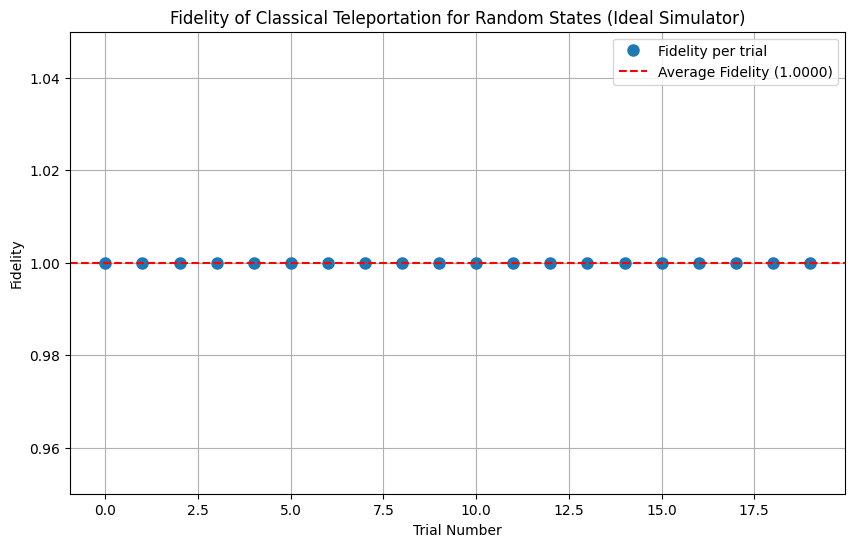

In [9]:
def run_classical_teleportation(theta, phi, simulator):
    initial_state_qc = QuantumCircuit(1)
    initial_state_qc.ry(theta, 0)
    initial_state_qc.rz(phi, 0)
    sv_initial = Statevector.from_instruction(initial_state_qc)
    rho_init = DensityMatrix(sv_initial)

    qr = QuantumRegister(3, name="q")
    crz = ClassicalRegister(1, name="crz")
    crx = ClassicalRegister(1, name="crx")
    qc = QuantumCircuit(qr, crz, crx)
    qc.ry(theta, 0)
    qc.rz(phi, 0)
    qc.barrier()
    qc.h(1)
    qc.cx(1, 2)
    qc.barrier()
    qc.cx(0, 1)
    qc.h(0)
    qc.barrier()
    qc.measure(0, crz)
    qc.measure(1, crx)
    qc.barrier()

    with qc.if_test((crx, 1)):
        qc.x(2)
    with qc.if_test((crz, 1)):
        qc.z(2)

    qc.save_statevector()

    compiled = transpile(qc, simulator)
    result = simulator.run(compiled).result()

    if not result.success:
        return 0.0

    sv_final_all = Statevector(result.data(0)["statevector"])

    rho_bob = partial_trace(sv_final_all, [0, 1])
    fidelity = np.real(np.trace(rho_init.data @ rho_bob.data))
    return fidelity

sim_ideal = AerSimulator()
num_samples = 20
fidelities = []

np.random.seed(42)
thetas = np.random.uniform(0, pi, num_samples)
phis = np.random.uniform(0, 2*pi, num_samples)

print(f"Running {num_samples} teleportation simulations for random states...")
for theta, phi in zip(thetas, phis):
    fid = run_classical_teleportation(theta, phi, sim_ideal)
    fidelities.append(fid)

avg_fidelity = np.mean(fidelities)
print(f"Ideal Teleportation Fidelity Analysis:")
print(f"Average Fidelity: {avg_fidelity:.6f}")

plt.figure(figsize=(10, 6))
plt.plot(fidelities, 'o', label='Fidelity per trial', markersize=8)
plt.axhline(y=avg_fidelity, color='r', linestyle='--', label=f'Average Fidelity ({avg_fidelity:.4f})')
plt.title('Fidelity of Classical Teleportation for Random States (Ideal Simulator)')
plt.xlabel('Trial Number')
plt.ylabel('Fidelity')
plt.ylim(0.95, 1.05)
plt.legend()
plt.grid(True)
plt.show()

##Task 4: Step-by-Step Visualization

Simulating circuit with multiple save points...
Simulation complete.

-------------------- Step 0: Initial State (Q0 has |ψ⟩, Q1/Q2 are |0⟩) --------------------


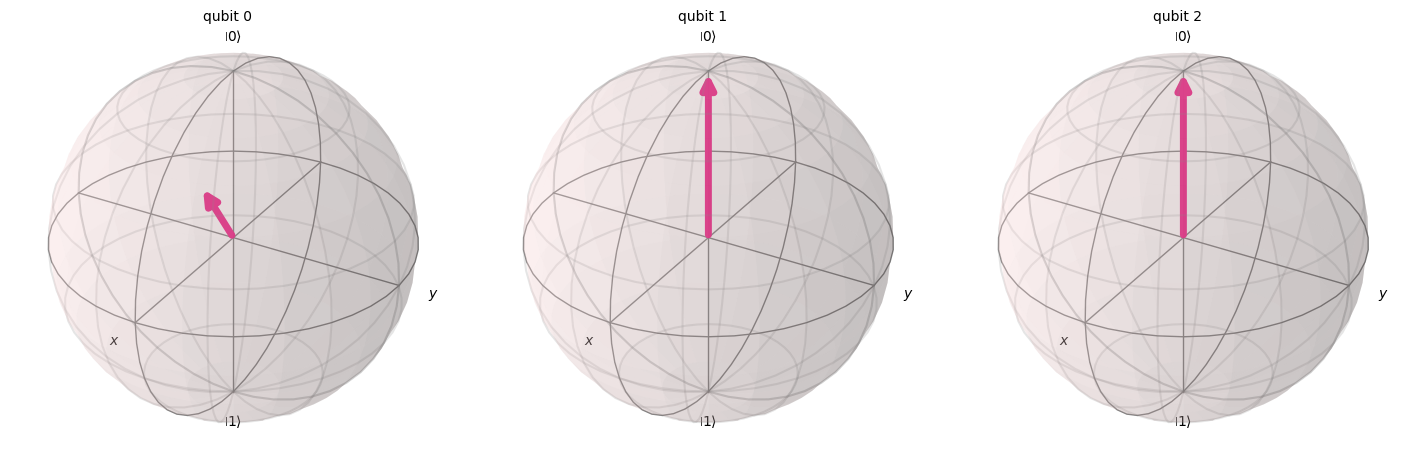


-------------------- Step 1: After Bell Pair (Q1/Q2 entangled, Q0 separate) --------------------


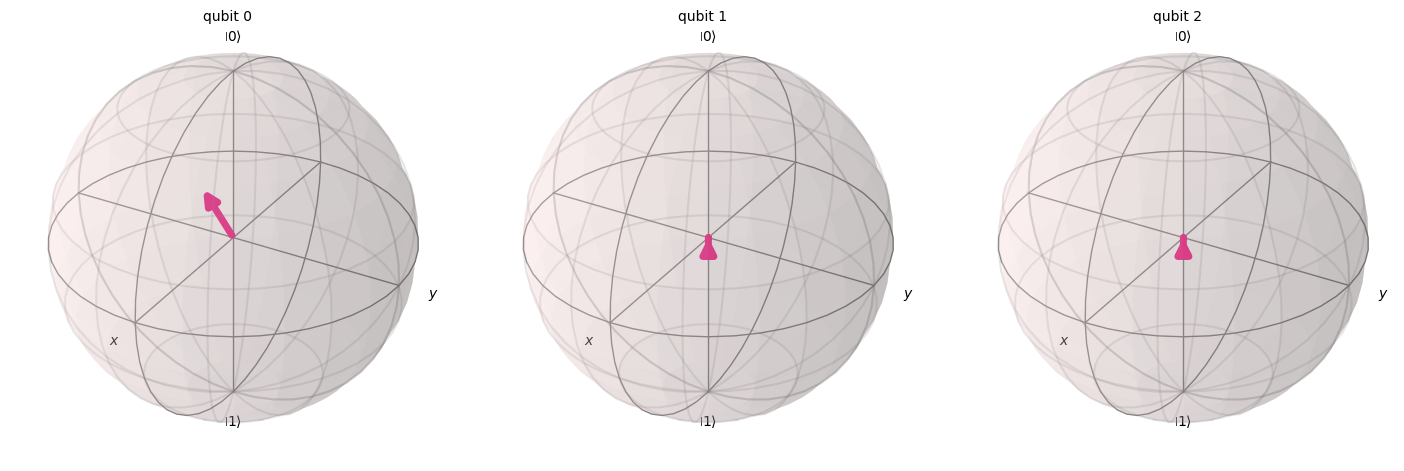


-------------------- Step 2: After Coherent "Measurement" (All 3 qubits entangled) --------------------


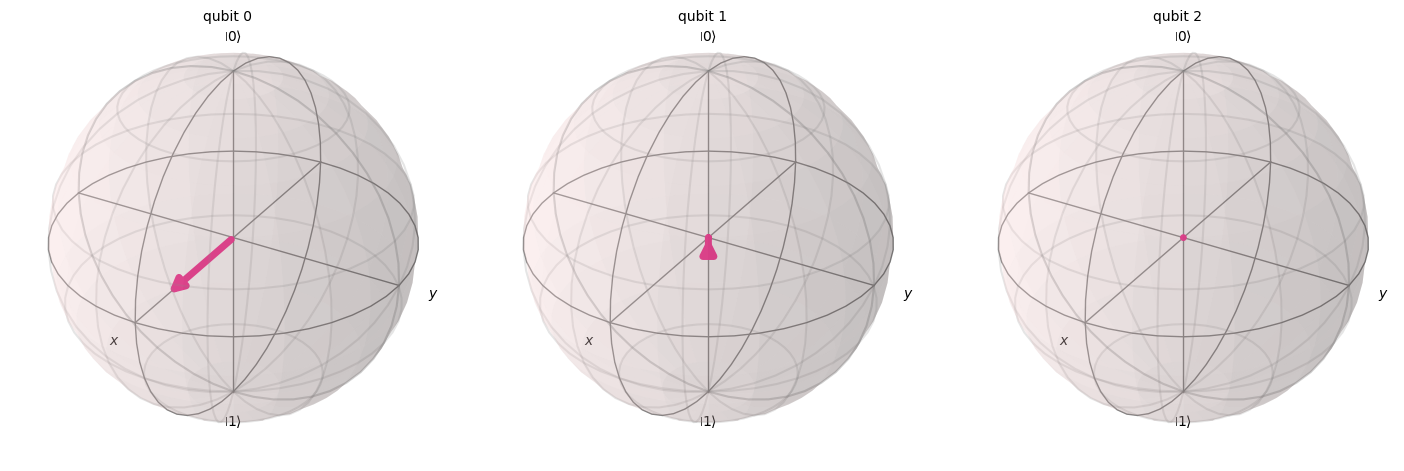


-------------------- Step 3: Final State (Q2 has |ψ⟩, Q0/Q1 disentangled) --------------------


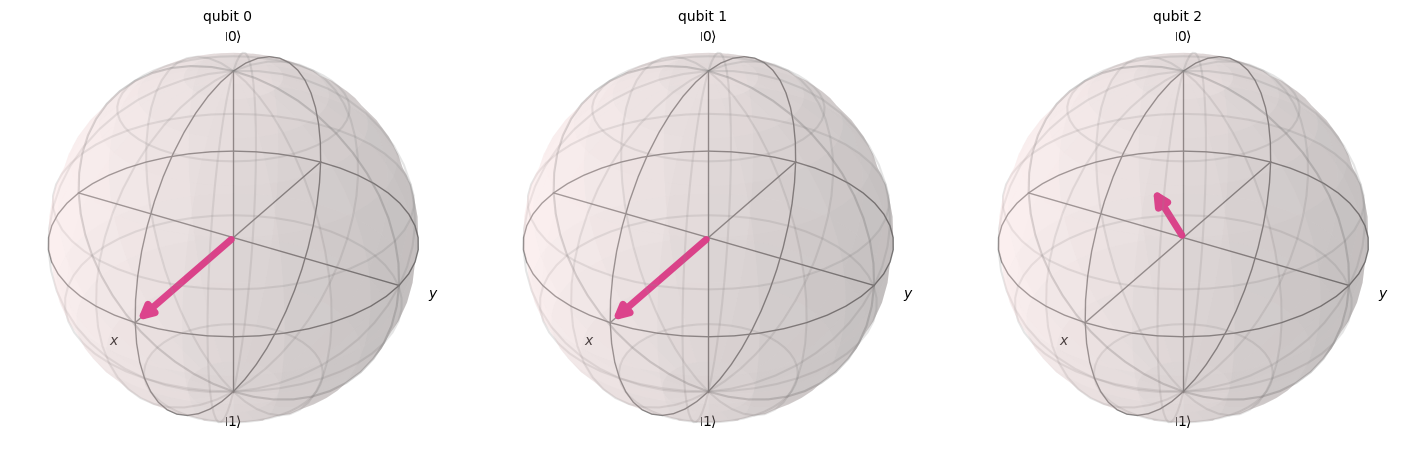

In [10]:
qc = QuantumCircuit(3)

theta, phi = 0.8, 0.3
qc.ry(theta, 0)
qc.rz(phi, 0)
qc.save_statevector(label='s0_initial_state')

qc.h(1)
qc.cx(1, 2)
qc.save_statevector(label='s1_after_bell_pair')

qc.cx(0, 1)
qc.h(0)
qc.save_statevector(label='s2_after_bell_measure')

qc.cx(1, 2)
qc.cz(0, 2)
qc.save_statevector(label='s3_final_state')

print("Simulating circuit with multiple save points...")
sim = AerSimulator()
compiled = transpile(qc, sim)
result = sim.run(compiled).result()
data = result.data(0)
print("Simulation complete.")

states_to_plot = {
    's0_initial_state': 'Step 0: Initial State (Q0 has |ψ⟩, Q1/Q2 are |0⟩)',
    's1_after_bell_pair': 'Step 1: After Bell Pair (Q1/Q2 entangled, Q0 separate)',
    's2_after_bell_measure': 'Step 2: After Coherent "Measurement" (All 3 qubits entangled)',
    's3_final_state': 'Step 3: Final State (Q2 has |ψ⟩, Q0/Q1 disentangled)'
}

for label, title in states_to_plot.items():
    if label in data:
        print(f"\n{'-'*20} {title} {'-'*20}")
        sv = Statevector(data[label])
        display(plot_bloch_multivector(sv))
    else:
        print(f"Could not find state: {label}")

##Task 5: Introduce Noise

Created a noise model:
NoiseModel:
  Basis gates: ['cx', 'cz', 'h', 'id', 'ry', 'rz', 'sx', 'x', 'z']
  Instructions with noise: ['rz', 'x', 'cz', 'id', 'z', 'cx', 'h', 'ry']
  All-qubits errors: ['ry', 'rz', 'h', 'x', 'z', 'id', 'cx', 'cz']

Running 20 simulations for IDEAL and NOISY simulators...

Fidelity Analysis Complete:
Average Fidelity (Ideal):     1.000000
Average Fidelity (Noisy):     0.968490
Fidelity Drop due to Noise: 0.031510


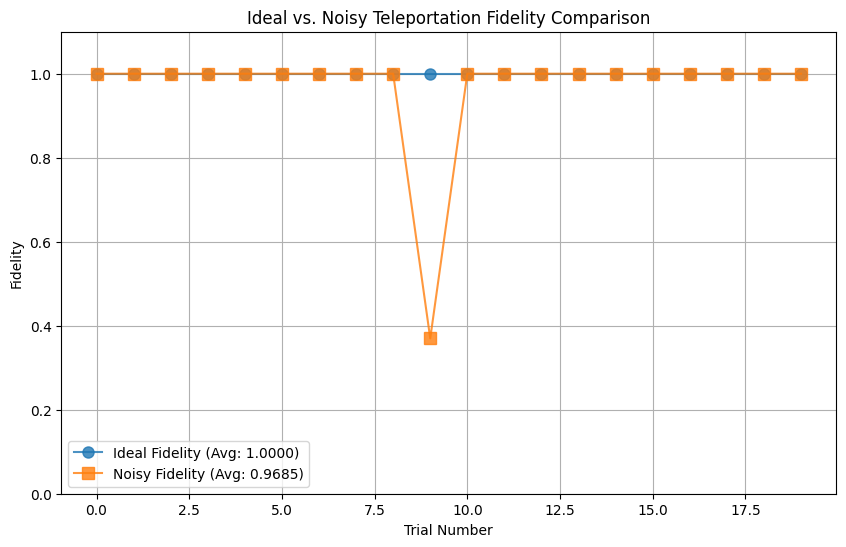

In [12]:
def run_classical_teleportation(theta, phi, simulator):
    initial_state_qc = QuantumCircuit(1)
    initial_state_qc.ry(theta, 0)
    initial_state_qc.rz(phi, 0)
    sv_initial = Statevector.from_instruction(initial_state_qc)
    rho_init = DensityMatrix(sv_initial)

    qr = QuantumRegister(3, name="q")
    crz = ClassicalRegister(1, name="crz")
    crx = ClassicalRegister(1, name="crx")
    qc = QuantumCircuit(qr, crz, crx)
    qc.ry(theta, 0); qc.rz(phi, 0); qc.barrier()
    qc.h(1); qc.cx(1, 2); qc.barrier()
    qc.cx(0, 1); qc.h(0); qc.barrier()
    qc.measure(0, crz); qc.measure(1, crx); qc.barrier()

    with qc.if_test((crx, 1)):
        qc.x(2)
    with qc.if_test((crz, 1)):
        qc.z(2)

    qc.save_statevector()

    compiled = transpile(qc, simulator)
    result = simulator.run(compiled).result()
    if not result.success: return 0.0
    sv_final_all = Statevector(result.data(0)["statevector"])

    rho_bob = partial_trace(sv_final_all, [0, 1])
    fidelity = np.real(np.trace(rho_init.data @ rho_bob.data))
    return fidelity

error_1 = depolarizing_error(0.01, 1)
error_2 = depolarizing_error(0.05, 2)

noise_model = NoiseModel()
noise_model.add_all_qubit_quantum_error(error_1, ['ry', 'rz', 'h', 'x', 'z', 'id'])
noise_model.add_all_qubit_quantum_error(error_2, ['cx', 'cz'])

print("Created a noise model:")
print(noise_model)

sim_ideal = AerSimulator()
sim_noise = AerSimulator(noise_model=noise_model)

num_samples = 20
fidelities_ideal = []
fidelities_noisy = []

np.random.seed(42)
thetas = np.random.uniform(0, pi, num_samples)
phis = np.random.uniform(0, 2*pi, num_samples)

print(f"\nRunning {num_samples} simulations for IDEAL and NOISY simulators...")
for theta, phi in zip(thetas, phis):
    fid_ideal = run_classical_teleportation(theta, phi, sim_ideal)
    fid_noisy = run_classical_teleportation(theta, phi, sim_noise)
    fidelities_ideal.append(fid_ideal)
    fidelities_noisy.append(fid_noisy)

avg_fidelity_ideal = np.mean(fidelities_ideal)
avg_fidelity_noisy = np.mean(fidelities_noisy)

print(f"\nFidelity Analysis Complete:")
print(f"Average Fidelity (Ideal):     {avg_fidelity_ideal:.6f}")
print(f"Average Fidelity (Noisy):     {avg_fidelity_noisy:.6f}")
print(f"Fidelity Drop due to Noise: {avg_fidelity_ideal - avg_fidelity_noisy:.6f}")

plt.figure(figsize=(10, 6))
plt.plot(fidelities_ideal, 'o-', label=f'Ideal Fidelity (Avg: {avg_fidelity_ideal:.4f})', alpha=0.8, markersize=8)
plt.plot(fidelities_noisy, 's-', label=f'Noisy Fidelity (Avg: {avg_fidelity_noisy:.4f})', alpha=0.8, markersize=8)
plt.title('Ideal vs. Noisy Teleportation Fidelity Comparison')
plt.xlabel('Trial Number')
plt.ylabel('Fidelity')
plt.ylim(0, 1.1)
plt.legend()
plt.grid(True)
plt.show()